KNN에서의 최적의 K값 찾기 <br><br>
k 값이 너무 작으면 모델은 너무 복잡 -> 오버피팅(과적합)<br>
k 값이 너무 크면 모델은 너무 단순 -> 언더피팅(과소적합)

<br> 가장 적절한 k 값을 선택함으로써, 모델의 일반화 능력을 최대화 해야

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


In [2]:
# 아이리스 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
# 1. 교차 검증

In [10]:

# k 값에 따른 교차 검증 점수 저장
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # 10-겹 교차 검증 사용
    k_scores.append(scores.mean())
    print(scores.mean())
# 최적의 k 값 출력
optimal_k = k_range[np.argmax(k_scores)] # np.argmax 함수 : 주어진 배열에서 최대값의 인덱스를 반환
print(f"최적의 k: {optimal_k}")


0.96
0.9533333333333334
0.9666666666666666
0.9666666666666666
0.9666666666666668
0.9666666666666668
0.9666666666666668
0.9666666666666668
0.9733333333333334
0.9666666666666668
0.9666666666666668
0.9733333333333334
0.9800000000000001
0.9733333333333334
0.9733333333333334
0.9733333333333334
0.9733333333333334
0.9800000000000001
0.9733333333333334
0.9800000000000001
0.9666666666666666
0.9666666666666666
0.9733333333333334
0.96
0.9666666666666666
0.96
0.9666666666666666
0.9533333333333334
0.9533333333333334
0.9533333333333334
최적의 k: 13


In [ ]:
# 2. 오류율 그래프

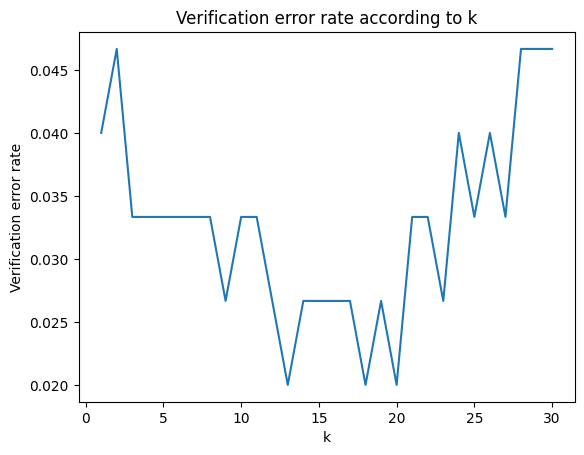

In [9]:
import matplotlib.pyplot as plt

# 오류율 그래프 그리기
plt.plot(k_range, [1 - score for score in k_scores])
plt.xlabel('k')
plt.ylabel('Verification error rate')
plt.title('Verification error rate according to k')
plt.show()


In [ ]:
# 제곱근

In [6]:
import math

# 데이터 포인트 수의 제곱근을 사용한 k 설정
n = len(X)
k = math.floor(math.sqrt(n))

# 홀수로 설정
if k % 2 == 0:
    k += 1

print(f"제안된 k 값: {k}")


제안된 k 값: 13


K-최근접 이웃(KNN) 알고리즘에서 동점 문제를 해결하는  방법

In [ ]:
# 1. k 값을 홀수로 설정하기
from sklearn.neighbors import KNeighborsClassifier

# k 값을 홀수로 설정
k = 5
knn = KNeighborsClassifier(n_neighbors=k)


In [ ]:
# 2. 가중치 투표

# 가중치를 거리에 반비례하게 적용
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')


In [ ]:
# 3. 임의 선택

# 동점 상황에서 임의로 클래스 선택하기
class_labels = [0, 1]  # 가능한 클래스 레이블
random_choice = np.random.choice(class_labels)


In [ ]:
# 4. 거리 측정 기준 변경

# 맨해튼 거리를 사용하는 KNN 모델
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')


In [ ]:
# 5. 최단 거리의 클래스 선택

from sklearn.neighbors import NearestNeighbors

# 최단 거리의 클래스 선택
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X_train)  # X_train은 훈련 데이터

distances, indices = nn.kneighbors(X_test)  # X_test는 테스트 데이터
nearest_class = y_train[indices[:, 0]]  # 가장 가까운 이웃의 클래스
